<a href="https://colab.research.google.com/github/MOISECHRIST/Tensorflow_DeepLearn_Course/blob/main/Tensorflow_Neural_Network_Fashion_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense

import numpy as np

Import Data

In [2]:
data = fashion_mnist.load_data()

In [3]:
X_train, y_train = data[0]
X_test, y_test = data[1]

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

Data Vizualisation

In [6]:
import matplotlib.pyplot as plt

In [7]:
img_id = np.random.choice(60000, 10)

In [8]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

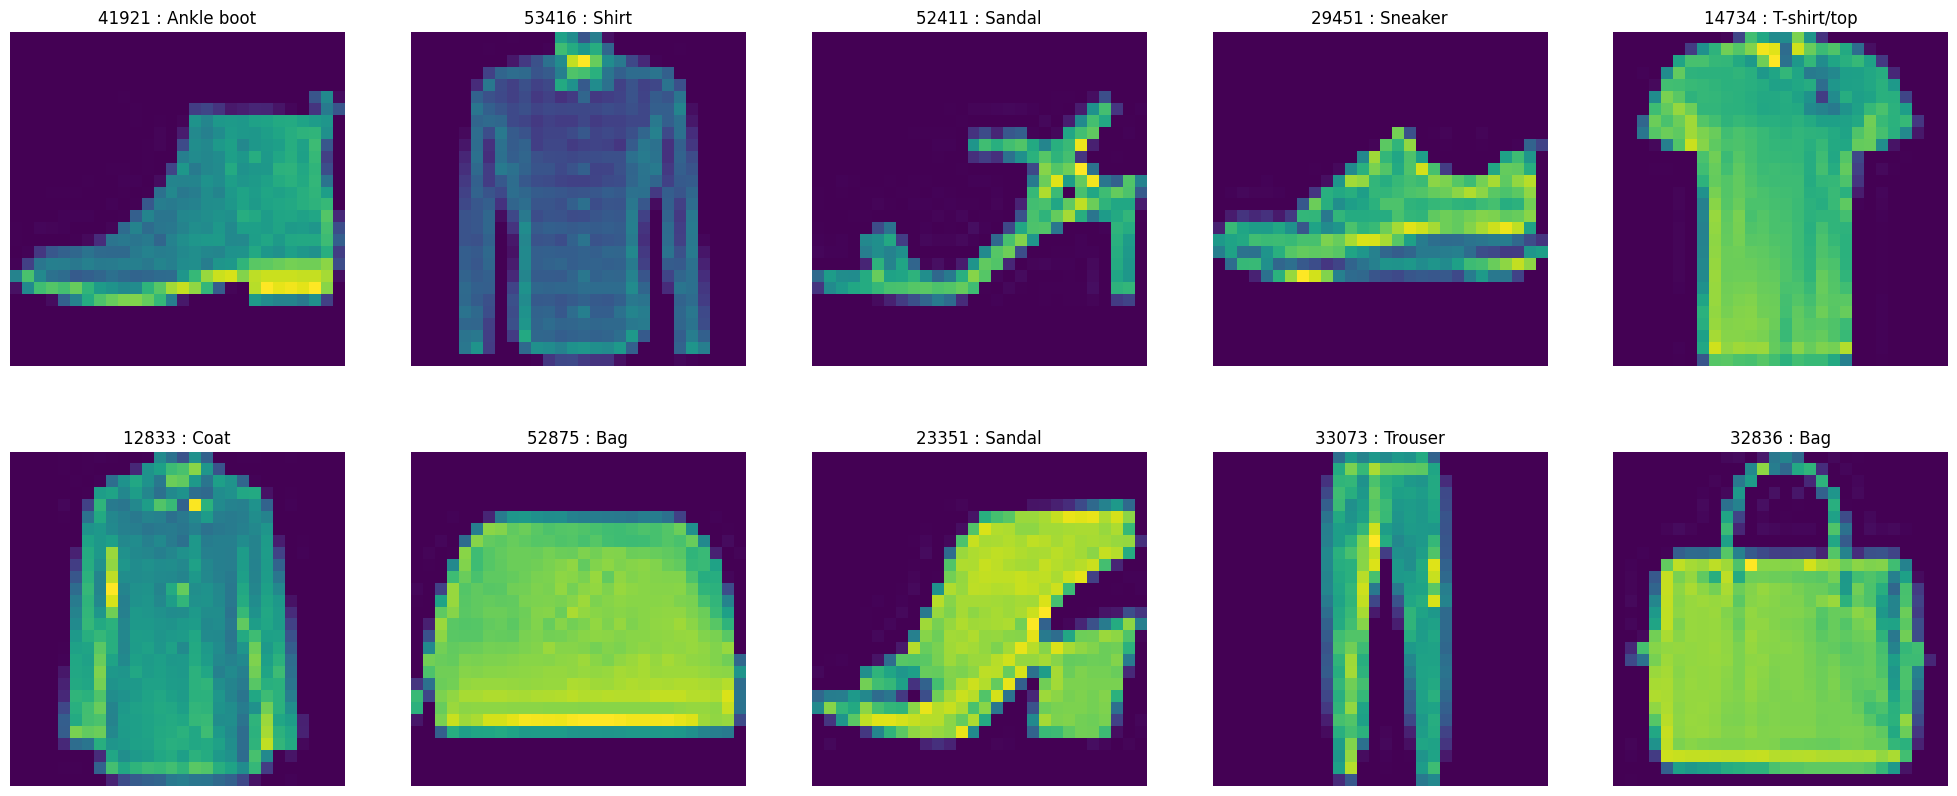

In [9]:
plt.figure(figsize=(25, 10))
for i, img in enumerate(img_id):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[img])
    plt.axis('off')
    plt.title(f"{img} : {labels[y_train[img]]}")

Inputs Data Processing

In [10]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [11]:
Flatten_X_train = X_train.reshape(60000, 784)
Flatten_X_test = X_test.reshape(10000, 784)

Outcome Processing

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
enc = OneHotEncoder()
ho_y_train = enc.fit_transform(y_train.reshape(60000,1))
hot_y_train = ho_y_train.toarray()

In [14]:
ho_y_train.shape

(60000, 10)

In [15]:
ho_y_test = enc.transform(y_test.reshape(10000,1))
hot_y_test = ho_y_test.toarray()

In [16]:
ho_y_test.shape

(10000, 10)

In [17]:
y_train[0], hot_y_train[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

In [18]:
y_test[0], hot_y_test[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

Model Configuration

In [19]:
model = Sequential()

In [20]:
model.add(Dense(units=784, activation='sigmoid', input_shape=(Flatten_X_train.shape[1],)))
model.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,290 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

Model Training

In [23]:
model.fit(Flatten_X_train,
          hot_y_train,
          epochs=20,
          batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.5198 - loss: 1.8453
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7198 - loss: 1.0521
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7352 - loss: 0.8547
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7520 - loss: 0.7662
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.7646 - loss: 0.7069
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7720 - loss: 0.6669
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.7771 - loss: 0.6463
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7823 - loss: 0.6268
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.7908 - loss: 0.6072
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7982 - loss: 0.5895
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.7997 - loss: 0.5774
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5

In [24]:
metrics=model.history.history

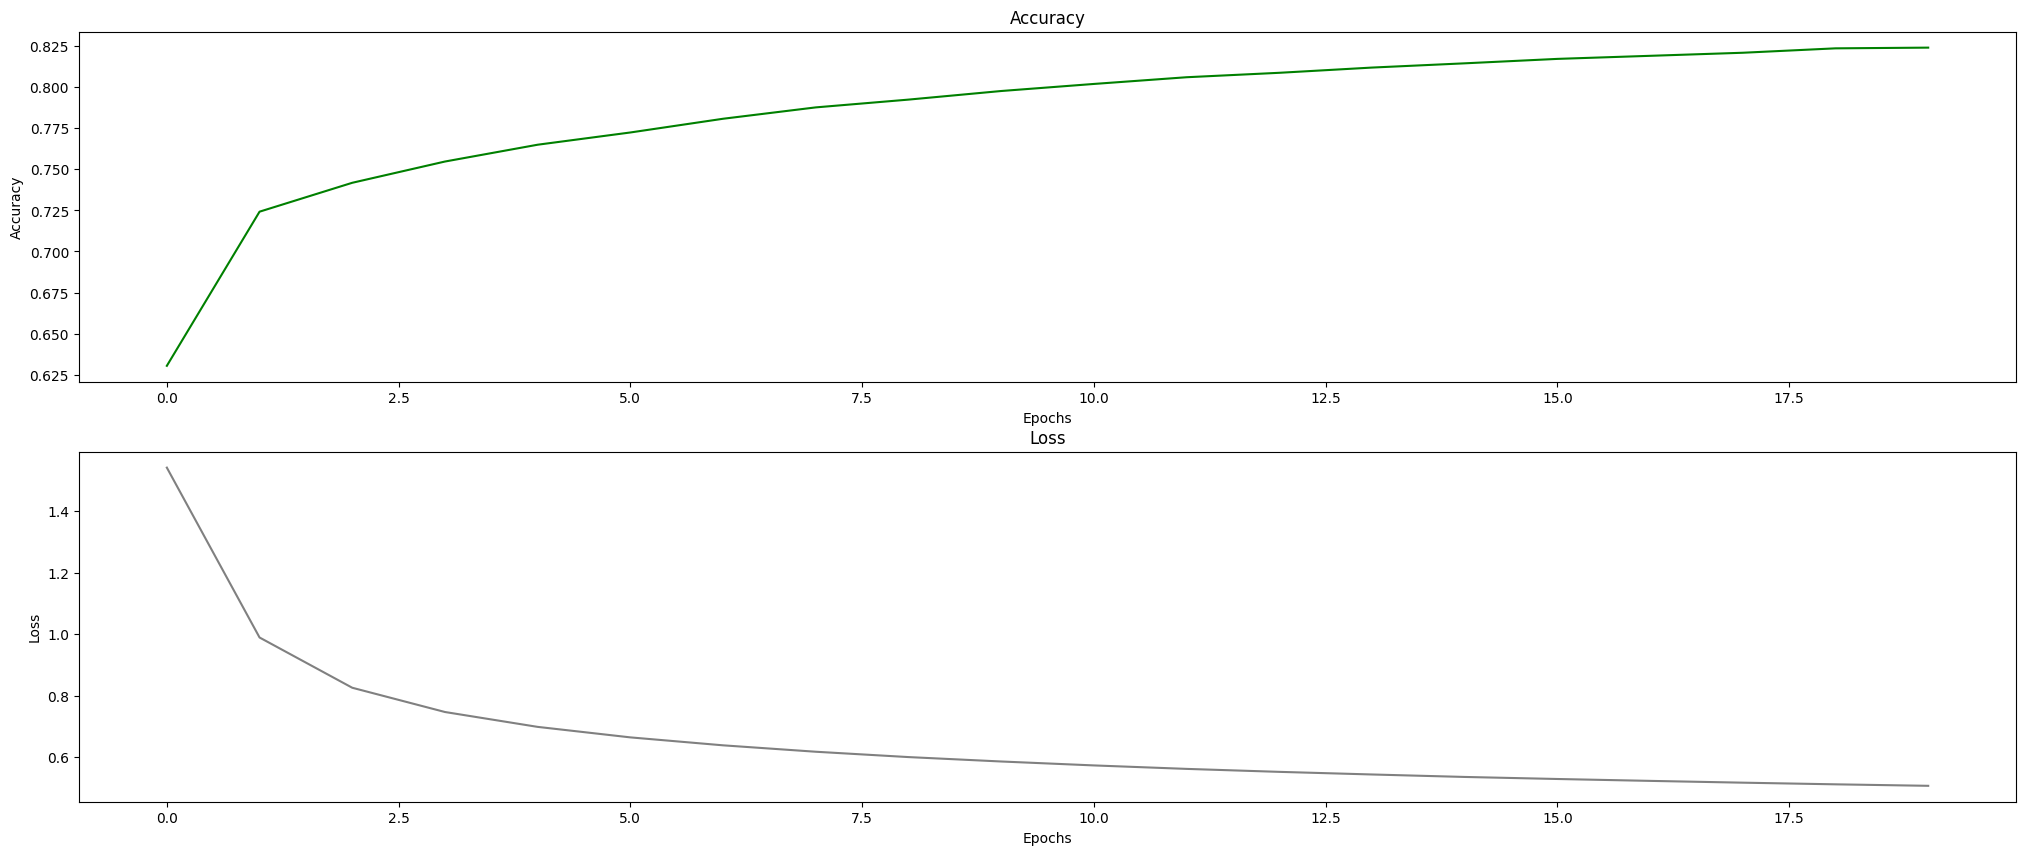

In [25]:
plt.figure(figsize=(25,10))
#Plot Accuracy
plt.subplot(2,1,1)
plt.plot(metrics['accuracy'], color='green')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


#Plot Loss
plt.subplot(2,1,2)
plt.plot(metrics['loss'], color='grey')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.show()

Model Evaluation

In [26]:
y_pred = model.predict(Flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


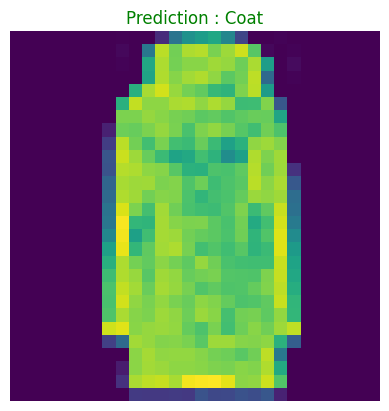

In [27]:
img = np.random.choice(10000)
plt.imshow(X_test[img])
plt.axis('off')
plt.title(f"Prediction : {labels[np.argmax(y_pred[img])]}", color='green' if np.argmax(y_pred[img])==y_test[img] else 'red')
plt.show()

In [28]:
y_pred_labels = np.array([labels[np.argmax(i)] for i in y_pred])
y_test_labels = np.array([labels[i] for i in y_test])

In [29]:
print(f"Test's accuracy : {100*np.sum(y_pred_labels==y_test_labels)/len(y_pred_labels):.3f} %")

Test's accuracy : 81.220 %


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [31]:
cm = confusion_matrix(y_test_labels, y_pred_labels)

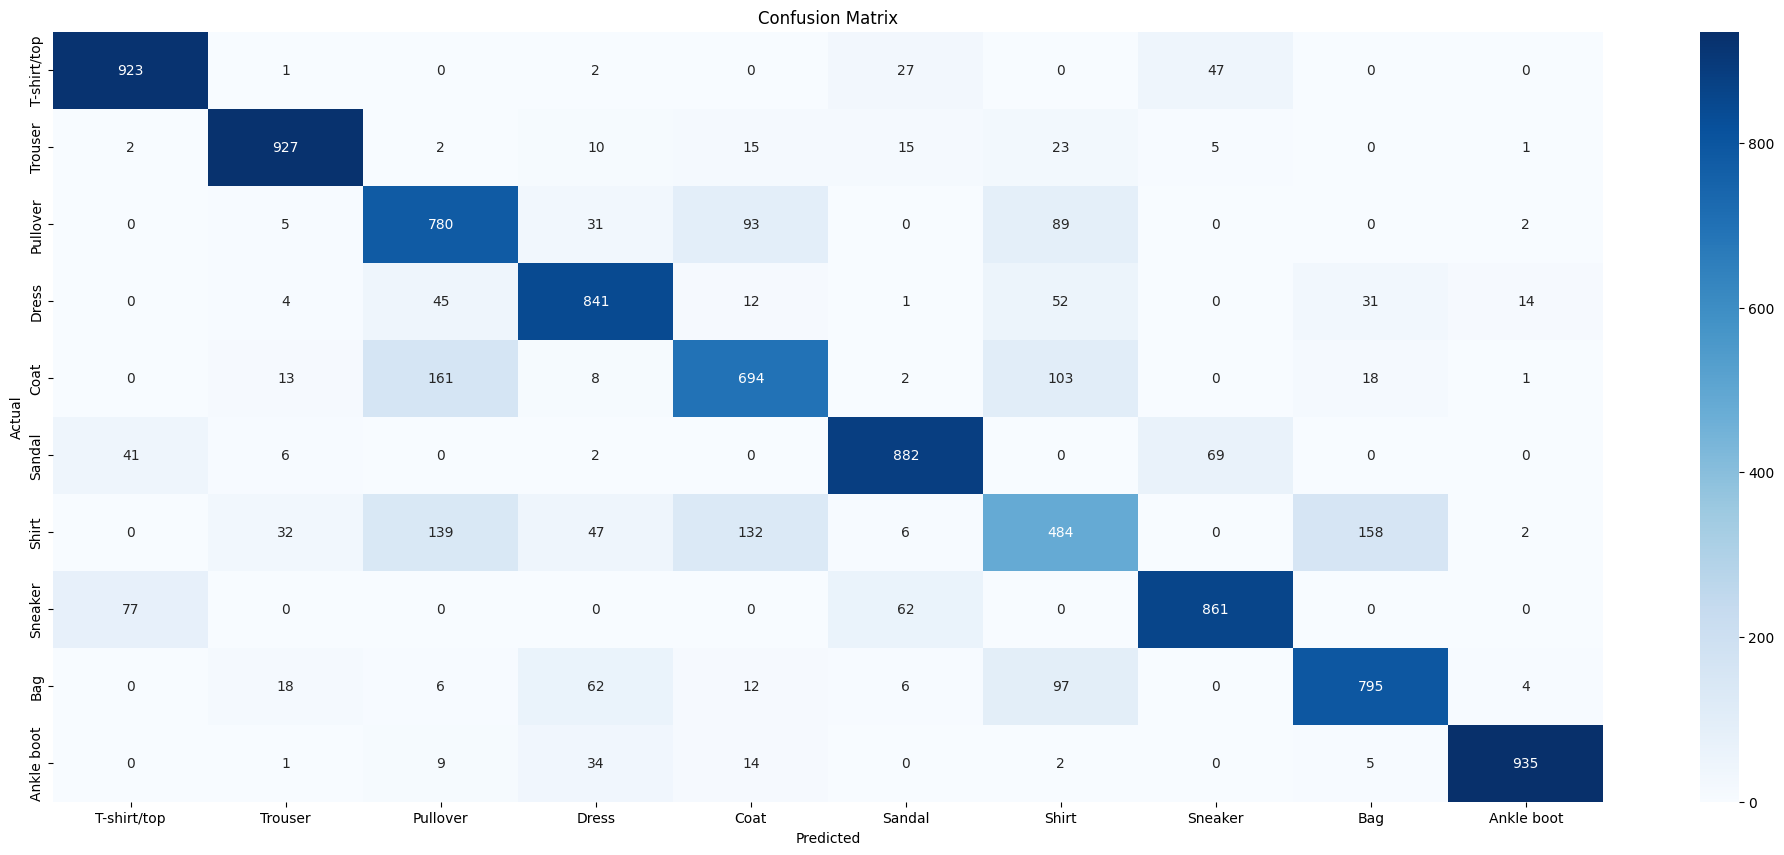

In [32]:
plt.figure(figsize=(25,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [33]:
from joblib import dump

In [34]:
dump(model, 'model_fashion_mnist_tf_neural_network.joblib')

['model_fashion_mnist_tf_neural_network.joblib']

In [35]:
model2 = Sequential()

In [36]:
model2.add(Dense(units=784, activation='relu', input_shape=(Flatten_X_train.shape[1],)))
model2.add(Dense(units=10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 784)                 │         615,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 623,292 (2.38 MB)

 Trainable params: 623,290 (2.38 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [38]:
model2.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model2.fit(Flatten_X_train,
          hot_y_train,
          epochs=20,
          batch_size=100)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6421 - loss: 1.2280
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8000 - loss: 0.6320
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8199 - loss: 0.5545
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8268 - loss: 0.5179
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8357 - loss: 0.4865
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8405 - loss: 0.4782
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8444 - loss: 0.4547
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8459 - loss: 0.4518
Epoch 9/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8504 - loss: 0.4390
Epoch 10/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8538 - loss: 0.4284
Epoch 11/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8556 - loss: 0.4212
Epoch 12/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 6s 

In [40]:
metrics2=model2.history.history

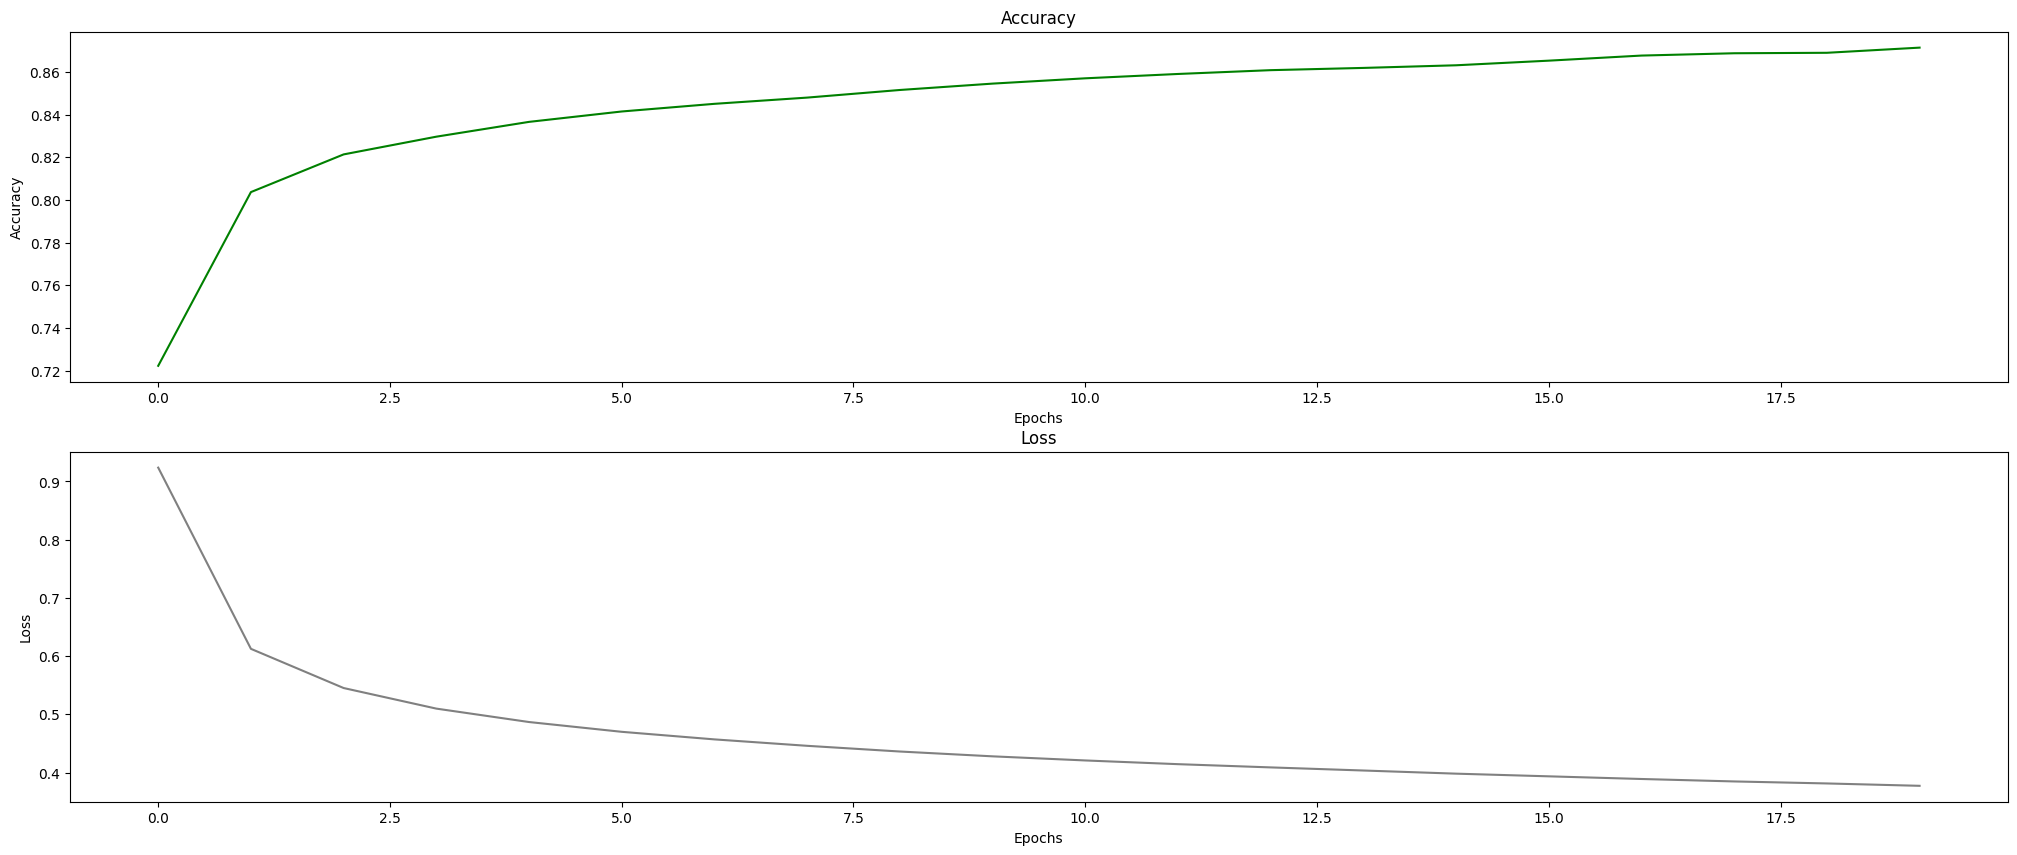

In [41]:
plt.figure(figsize=(25,10))
#Plot Accuracy
plt.subplot(2,1,1)
plt.plot(metrics2['accuracy'], color='green')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


#Plot Loss
plt.subplot(2,1,2)
plt.plot(metrics2['loss'], color='grey')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')


plt.show()

In [42]:
y_pred2 = model2.predict(Flatten_X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


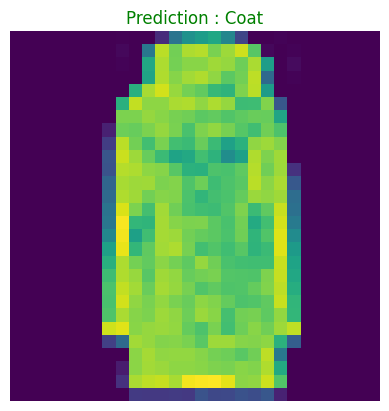

In [43]:
plt.imshow(X_test[img])
plt.axis('off')
plt.title(f"Prediction : {labels[np.argmax(y_pred2[img])]}", color='green' if np.argmax(y_pred2[img])==y_test[img] else 'red')
plt.show()

In [44]:
y_pred2_labels = np.array([labels[np.argmax(i)] for i in y_pred2])

In [45]:
print(f"Test's accuracy : {100*np.sum(y_pred2_labels==y_test_labels)/len(y_pred2_labels):.3f} %")

Test's accuracy : 85.290 %


In [46]:
cm2 = confusion_matrix(y_test_labels, y_pred2_labels)

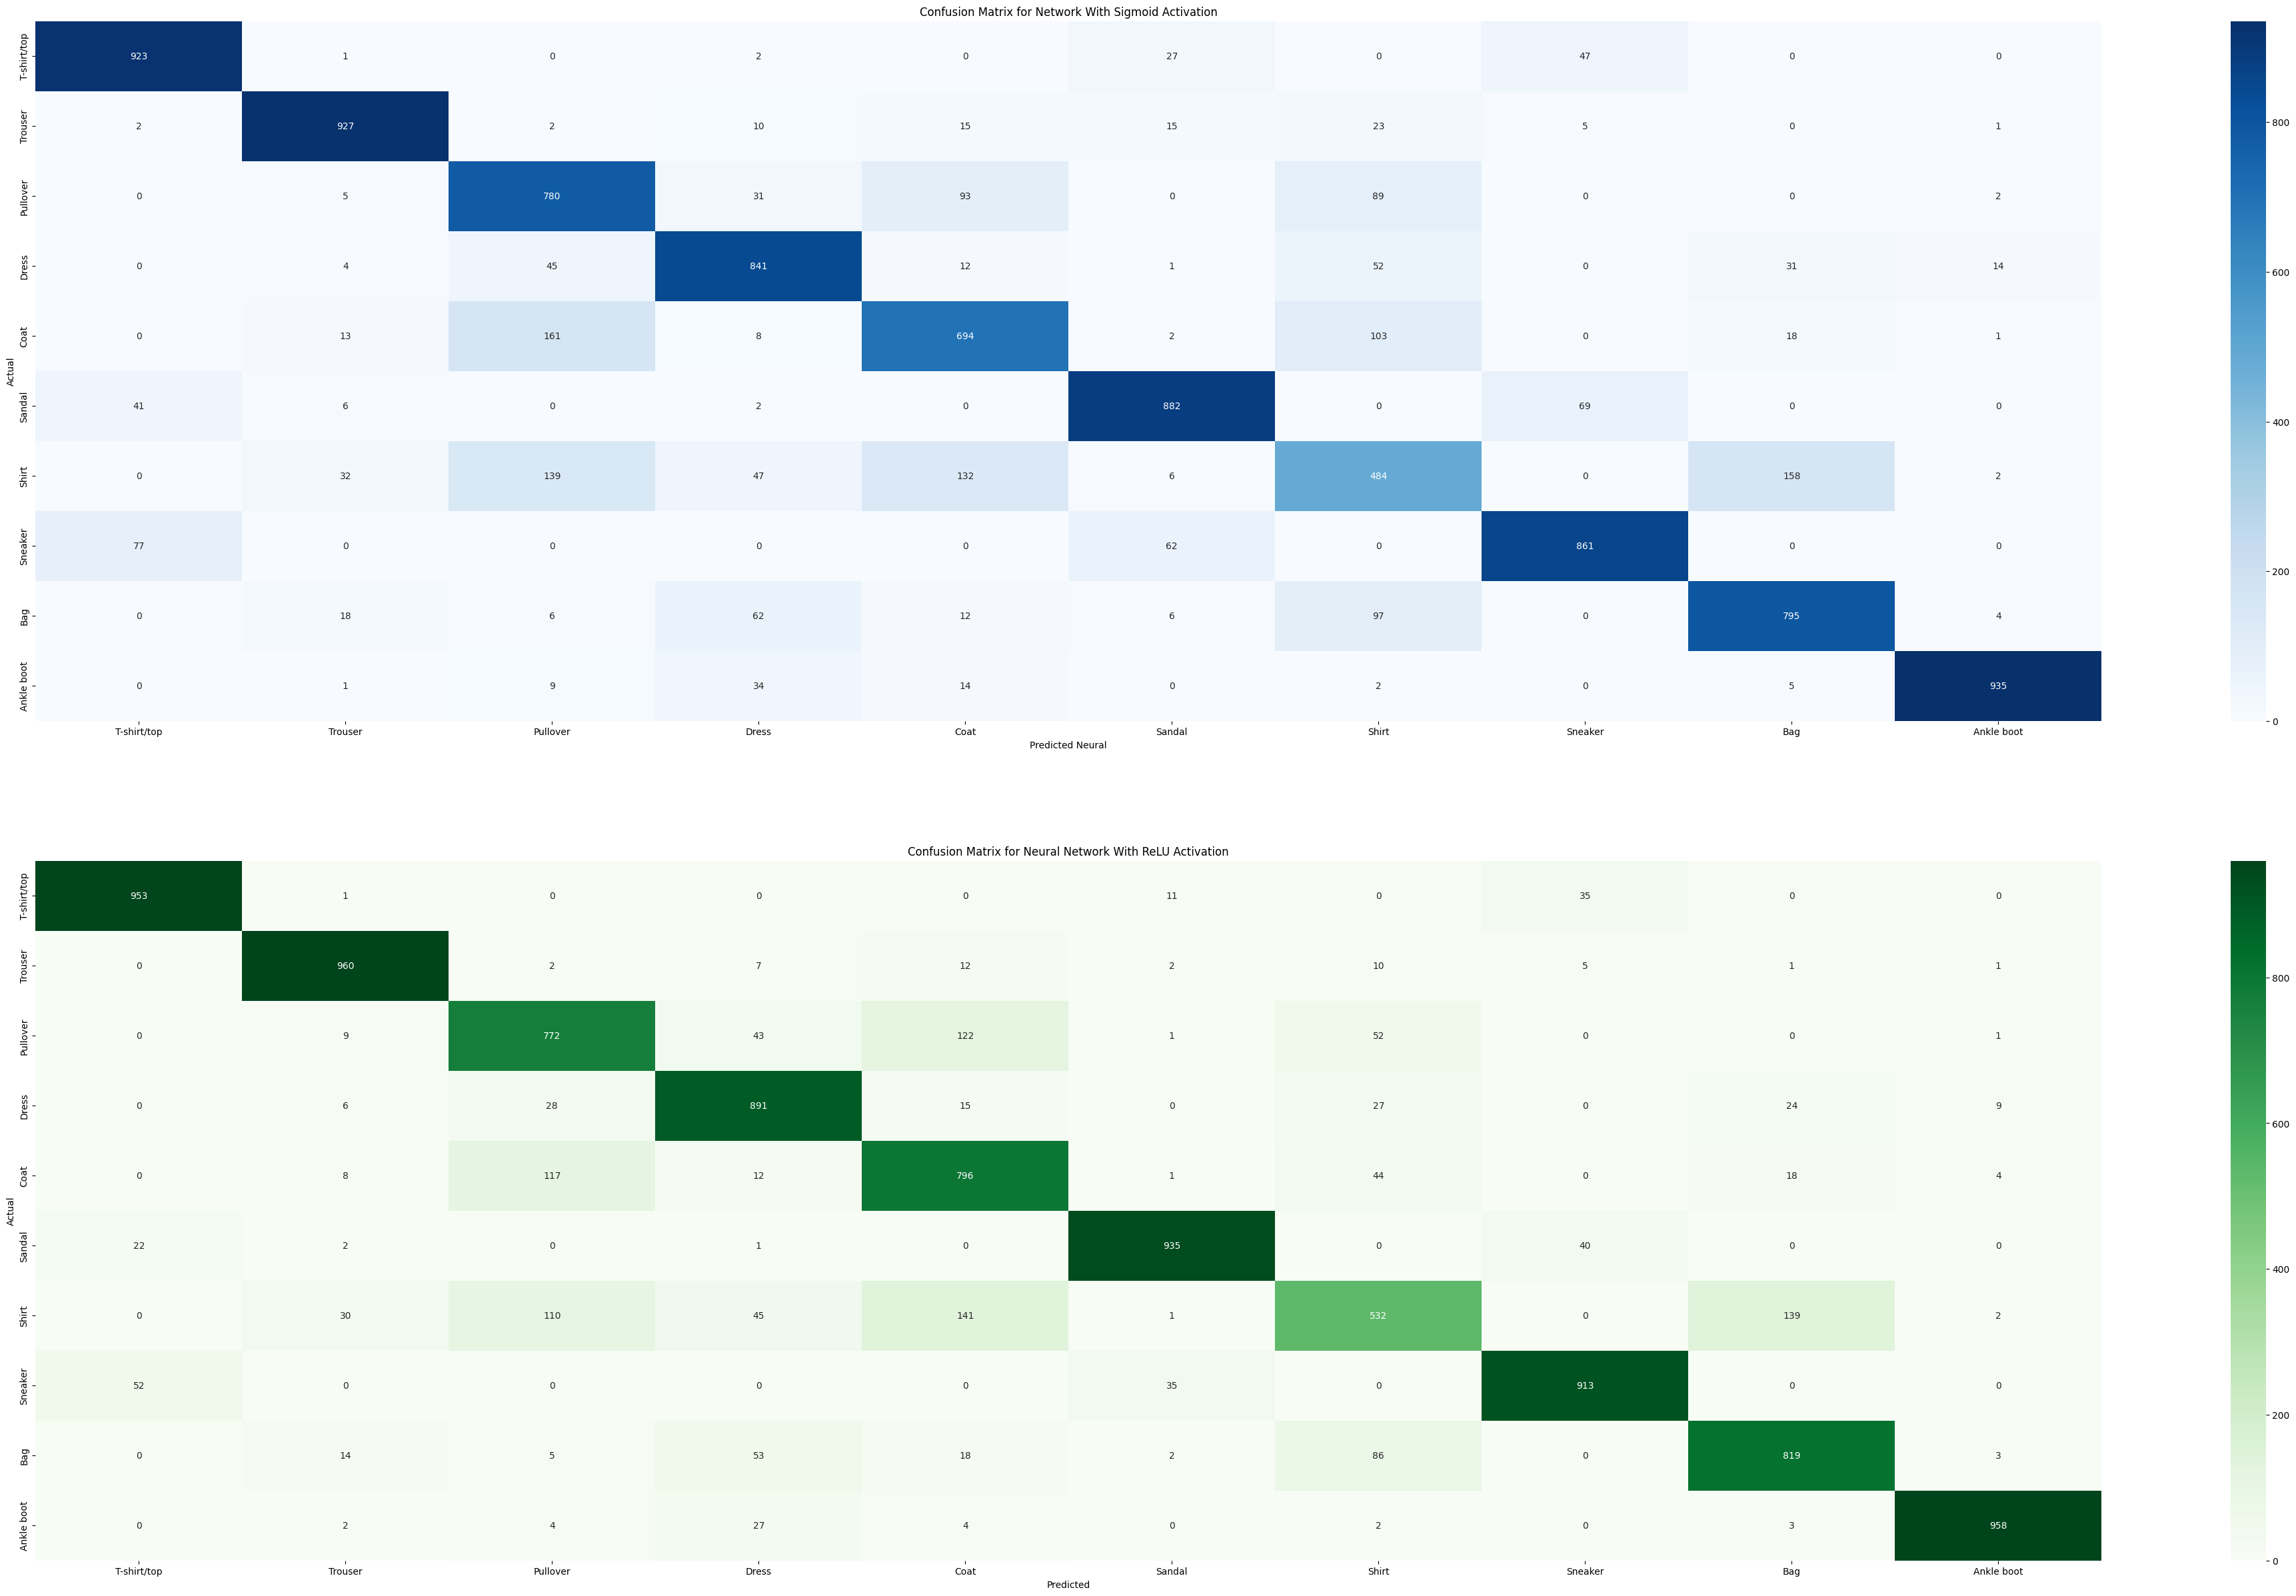

In [47]:
plt.figure(figsize=(50,30))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Neural')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Network With Sigmoid Activation')

plt.subplot(2,1,2)
sns.heatmap(cm2, annot=True, cmap='Greens',fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Neural Network With ReLU Activation')
plt.show()

In [48]:
dump(model, 'model_relu_fashion_mnist_tf_neural_network.joblib')

['model_relu_fashion_mnist_tf_neural_network.joblib']

In [49]:
import pandas as pd

In [75]:
def compute_metrics(conf_mat, labels):
  sum_col=[]
  sum_line=[]
  df=[]
  for index in range(conf_mat.shape[0]):
    sum_col.append(np.sum(cm[:,index]))
    sum_line.append(np.sum(cm[index,:]))


  for index in range(cm.shape[0]):
      res=dict()
      precision=cm[index,index]/sum_col[index]
      rappel=cm[index,index]/sum_line[index]
      f1score = 1/((1/2)*((1/precision)+(1/rappel)))
      res["Precision"]=float(precision)
      res["Rappel"]=float(rappel)
      res["F1Score"]=float(f1score)
      res["Classe"]=labels[index]
      df.append(res)
  return pd.DataFrame(df)

In [77]:
metrics_cm=compute_metrics(cm, labels)
metrics_cm2=compute_metrics(cm2, labels)

In [78]:
def plot_metrics(df):
  FIG_SIZE=[25,20]
  plt.figure(figsize=FIG_SIZE)
  plt.subplot(3,1,1)
  # Création du barplot
  barplot = sns.barplot(data=df, y='Precision', x=df.index, color='slategray')
  plt.xlabel('Classe')
  # Ajout des annotations
  for p in barplot.patches:
      barplot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
  barplot.set_xticklabels(labels)

  plt.subplot(3,1,2)

  # Création du barplot
  barplot = sns.barplot(data=df,y='Rappel', x=df.index,color='slategray')
  plt.xlabel('Classe')
  # Ajout des annotations
  for p in barplot.patches:
      barplot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
  barplot.set_xticklabels(labels)
  plt.subplot(3,1,3)
  # Création du barplot
  barplot = sns.barplot(data=df,y='F1Score', x=df.index,color='slategray')
  plt.xlabel('Classe')
  # Ajout des annotations
  for p in barplot.patches:
      barplot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')
  barplot.set_xticklabels(df['Classe'])
  plt.show()

<ipython-input-78-dd464707a815>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-78-dd464707a815>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-78-dd464707a815>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(df['Classe'])


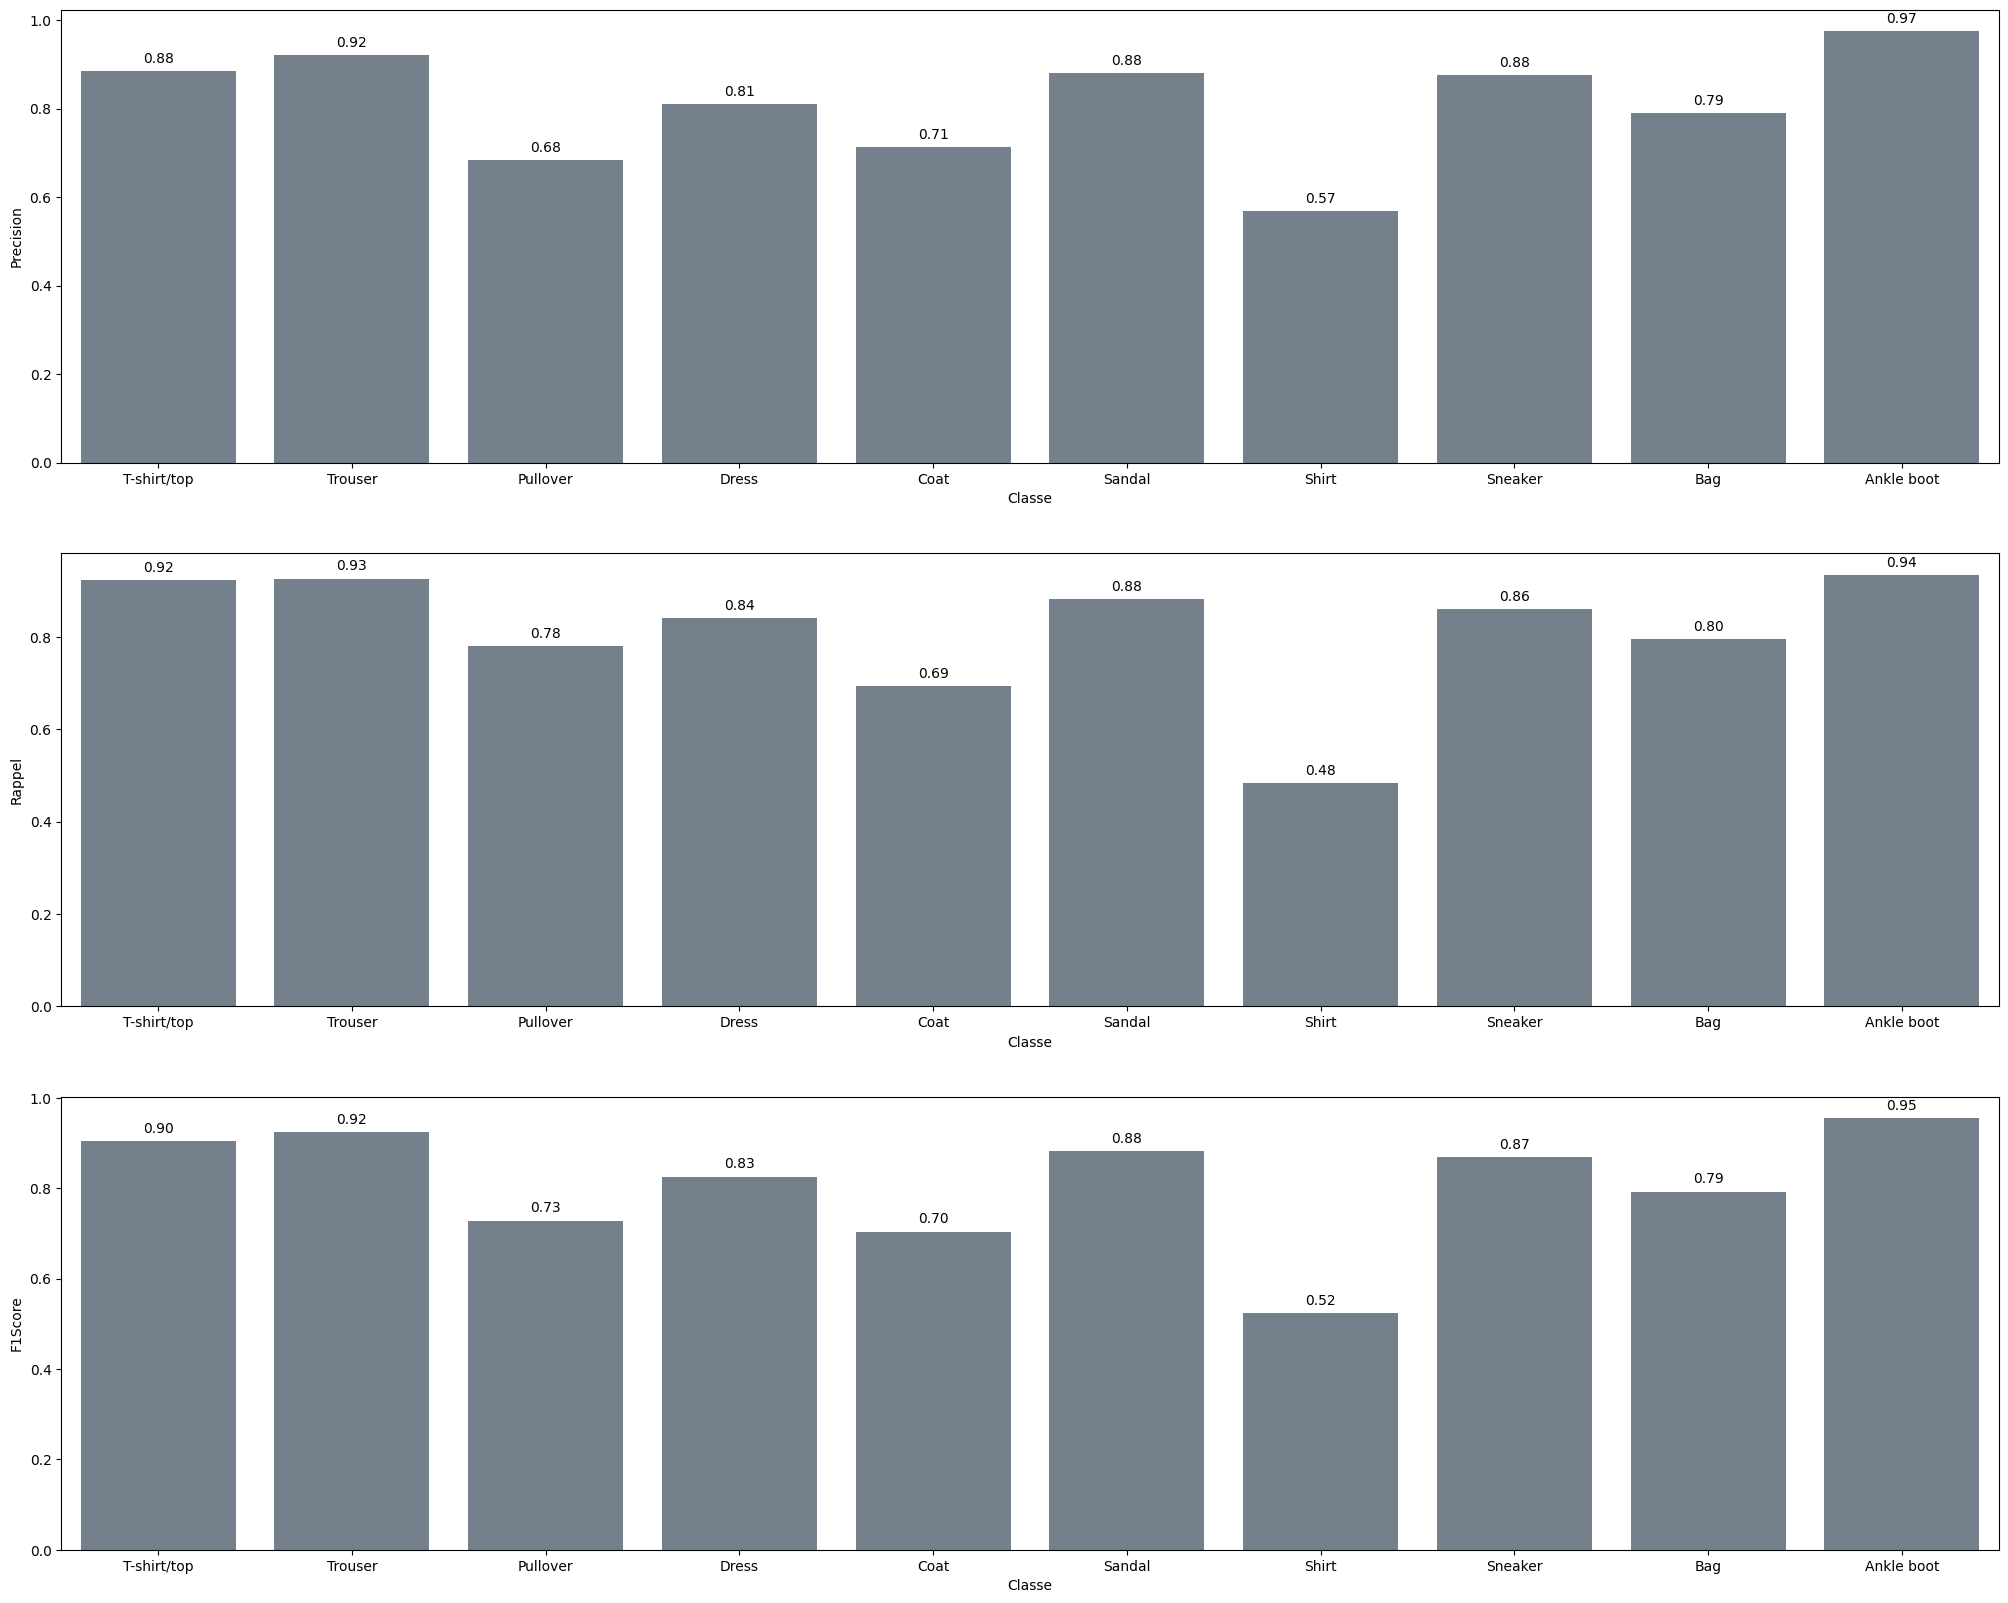

In [79]:
plot_metrics(metrics_cm)

<ipython-input-78-dd464707a815>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-78-dd464707a815>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(labels)
<ipython-input-78-dd464707a815>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(df['Classe'])


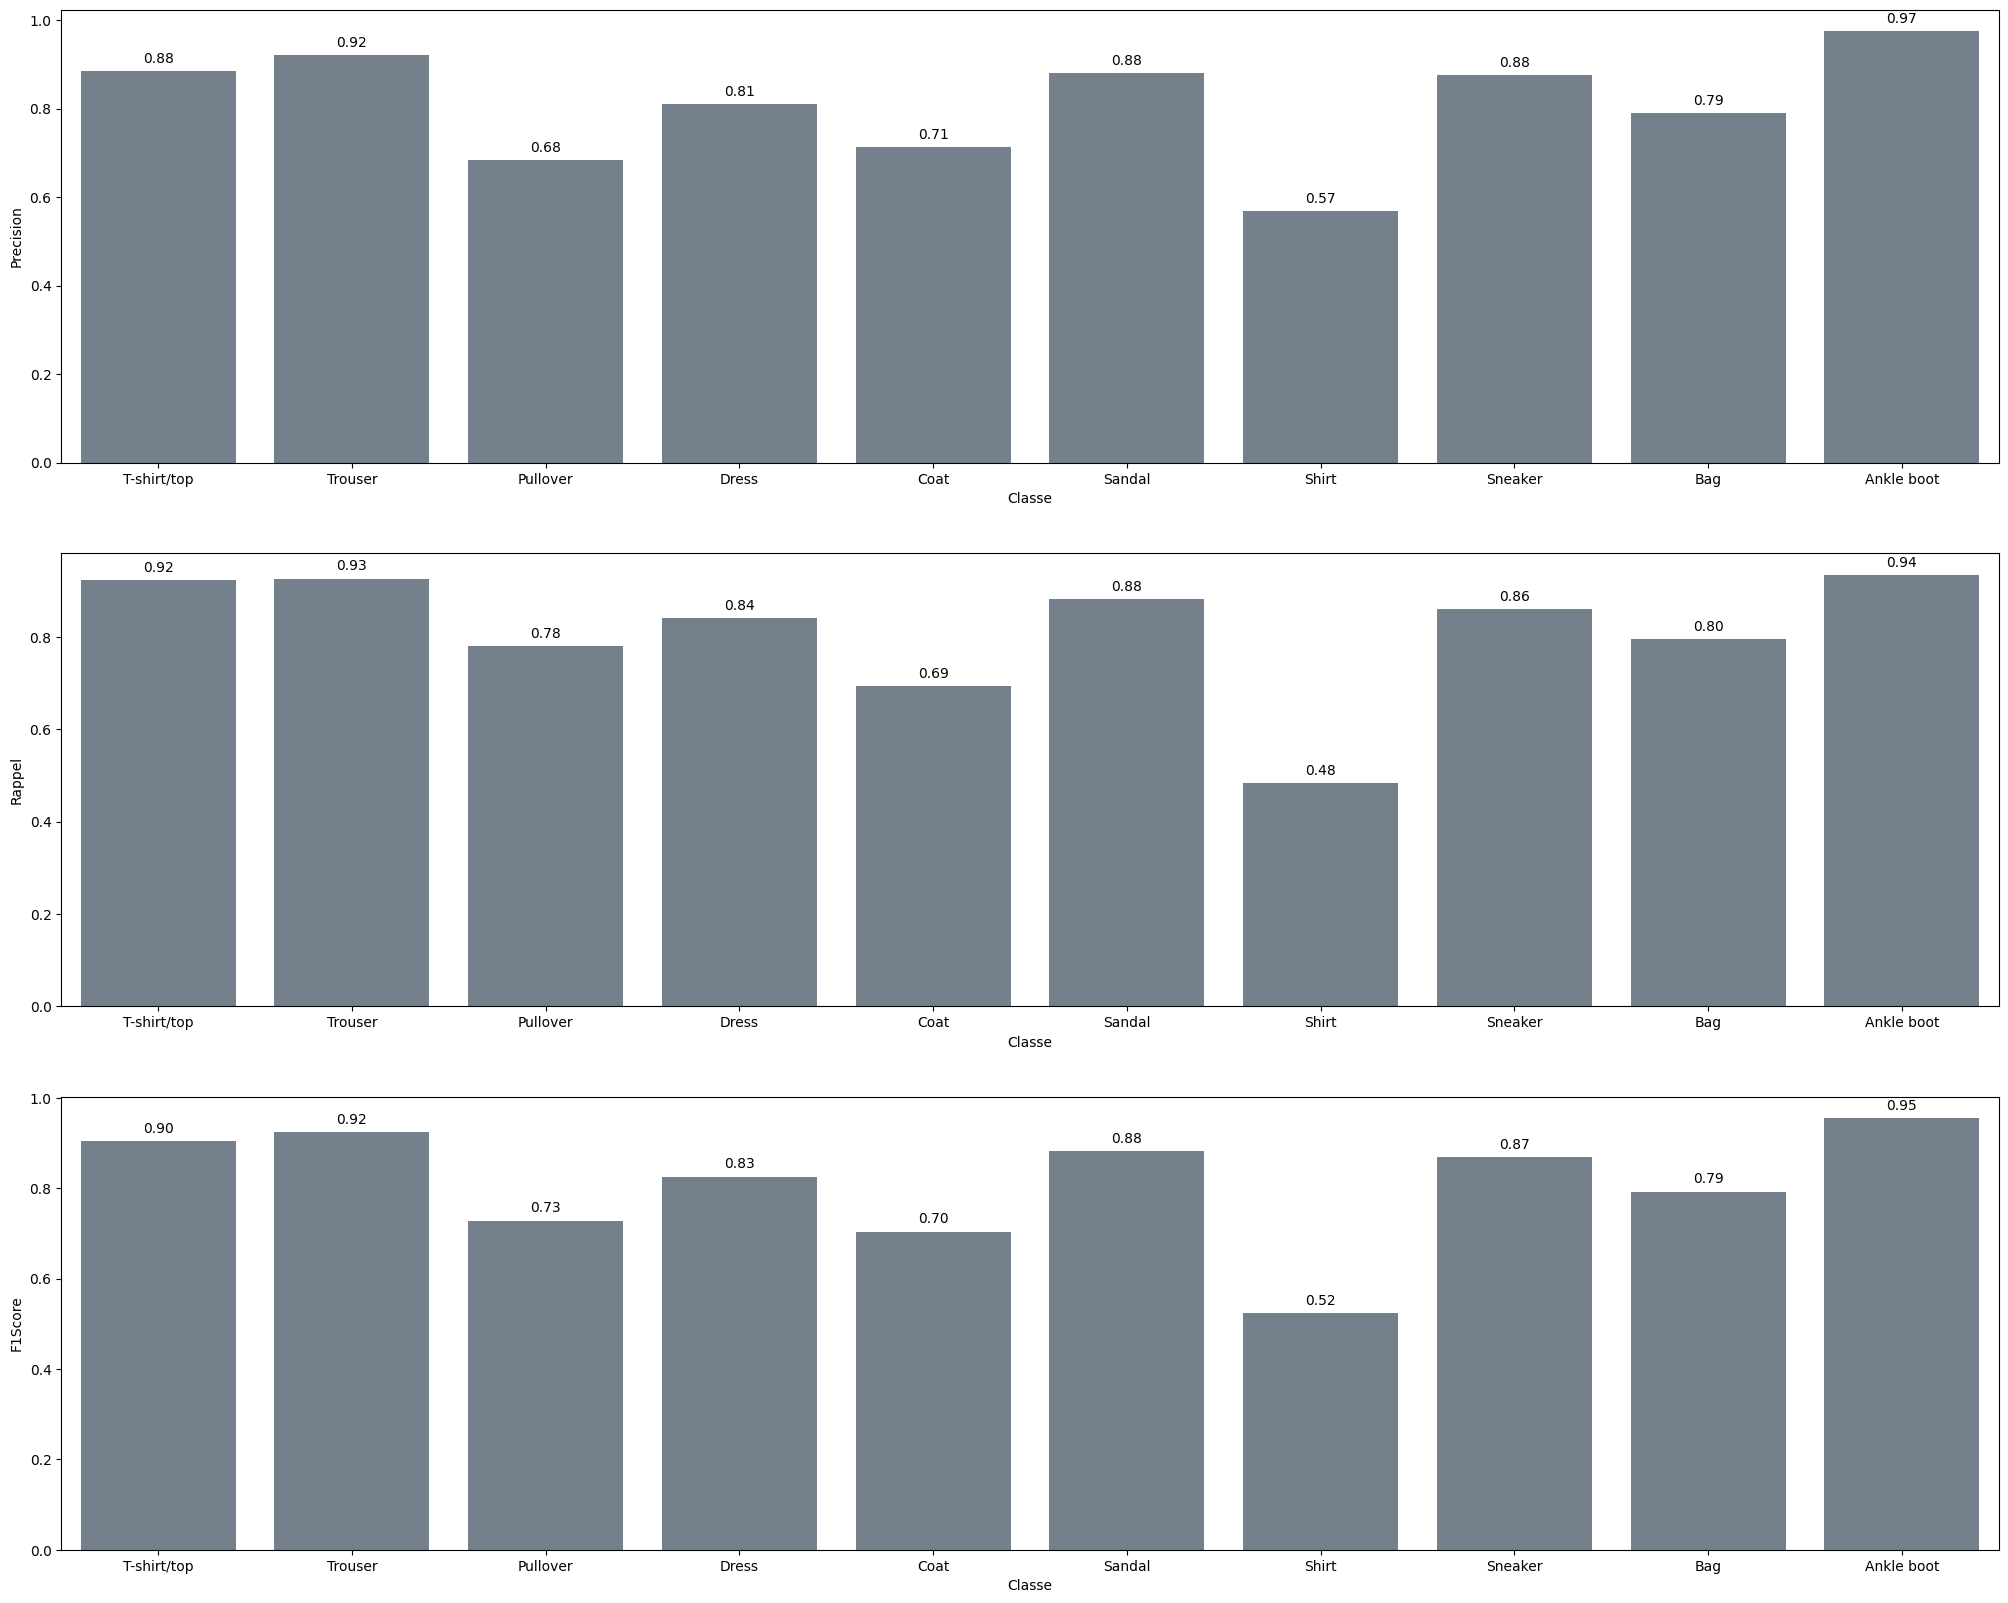

In [80]:
plot_metrics(metrics_cm2)

In [81]:
metrics_cm

,Precision,Rappel,F1Score,Classe
0,0.884947,0.923,0.903573,T-shirt/top
1,0.920556,0.927,0.923767,Trouser
2,0.683012,0.780,0.728291,Pullover
3,0.810993,0.841,0.825724,Dress
4,0.713992,0.694,0.703854,Coat
5,0.881119,0.882,0.881559,Sandal
6,0.569412,0.484,0.523243,Shirt
7,0.876782,0.861,0.868819,Sneaker
8,0.789474,0.795,0.792227,Bag
9,0.974974,0.935,0.954569,Ankle boot


In [82]:
metrics_cm

,Precision,Rappel,F1Score,Classe
0,0.884947,0.923,0.903573,T-shirt/top
1,0.920556,0.927,0.923767,Trouser
2,0.683012,0.780,0.728291,Pullover
3,0.810993,0.841,0.825724,Dress
4,0.713992,0.694,0.703854,Coat
5,0.881119,0.882,0.881559,Sandal
6,0.569412,0.484,0.523243,Shirt
7,0.876782,0.861,0.868819,Sneaker
8,0.789474,0.795,0.792227,Bag
9,0.974974,0.935,0.954569,Ankle boot
